## In this We're going to Perform some EDA on the FIFA Dataset, obtained from kaggle
# link: https://www.kaggle.com/mathan/fifa-2018-match-statistics

In [335]:
import pandas as pd
data=pd.read_csv('./fifa.csv')

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [65]:
from pandas.plotting import scatter_matrix

In [4]:
data.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


Each pair of successive rows are one match, Also something to notice is that there's no won or lost column, it has to be deduced from each side goal count, or PSO (Penalty Shootout) results.

Clearly the data has alot of attributes, let's print them

In [5]:
print(list(data.columns))

['Date', 'Team', 'Opponent', 'Goal Scored', 'Ball Possession %', 'Attempts', 'On-Target', 'Off-Target', 'Blocked', 'Corners', 'Offsides', 'Free Kicks', 'Saves', 'Pass Accuracy %', 'Passes', 'Distance Covered (Kms)', 'Fouls Committed', 'Yellow Card', 'Yellow & Red', 'Red', 'Man of the Match', '1st Goal', 'Round', 'PSO', 'Goals in PSO', 'Own goals', 'Own goal Time']


There's alot of interesting alot to explore/plot, for example the relationship between Ball Possession and Passes, Attempts, Free Kicks, relationship between date and distance covered by teams, Winning teams and man of the match choice. let's start with Ball Possession % exploration first

In [7]:
data['Ball Possession %'].sort_values().head()

101    25
11     28
57     29
80     30
38     30
Name: Ball Possession %, dtype: int64

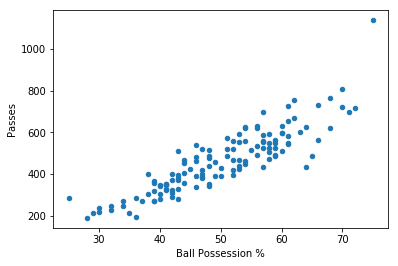

In [58]:
data.plot.scatter('Ball Possession %', 'Passes')

Oh, that's very clean.. seems like there's a linear relationship between posession and passes except for 2 outliers, let's see who these outliers are

In [61]:
data[data['Ball Possession %']>74]

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
100,01-07-2018,Spain,Russia,1,75,25,9,6,10,6,...,1,0,0,No,12.0,Round of 16,Yes,3,NaN,NaN


Okay, here's our outlier, Spain vs Russia, where Russia won in penalty shootout, apparently spain was dominating in terms of possession. enough about that match lets continue.

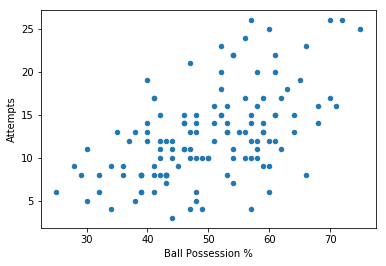

In [62]:
data.plot.scatter('Ball Possession %', 'Attempts')

Damn that's messy(high variance), although the trend is clearly increasing

Okay, I got an idea, lets visually estimate the disribution of all the numeric features, lets put them in another dataframe

In [147]:
data2=pd.DataFrame(data[['Goal Scored','Ball Possession %','Attempts','On-Target','Off-Target',
            'Blocked','Offsides','Free Kicks','Saves','Pass Accuracy %',
            'Passes','Distance Covered (Kms)']])

In [148]:
print(list(data2.columns))

['Goal Scored', 'Ball Possession %', 'Attempts', 'On-Target', 'Off-Target', 'Blocked', 'Offsides', 'Free Kicks', 'Saves', 'Pass Accuracy %', 'Passes', 'Distance Covered (Kms)']


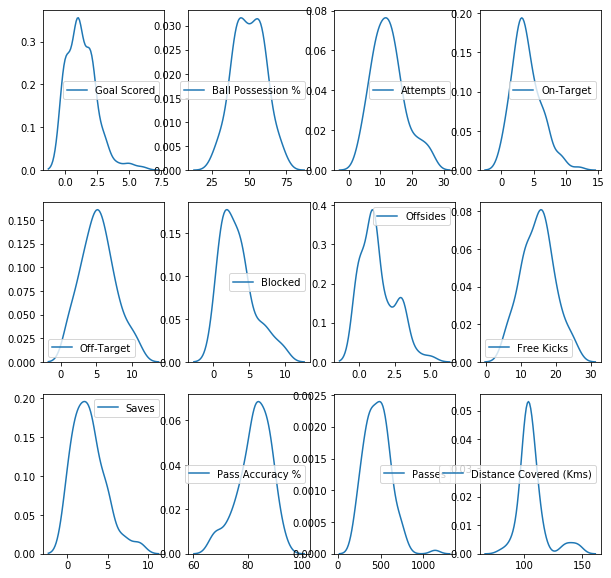

In [161]:
plt.figure(figsize=(10,10))
for i,col in enumerate(data2.columns):
    plt.subplot(3,4,i+1)
    sns.kdeplot(data2[col],legend=True)
    

Things observed from the distribution of the variables:
Ball Possession is symmetric, because every value has it's complement for the opponent team.
There's a tiny bell curve that shows up, and i assume it's because of playing extra time, in variables like Distance Covered, Passes, On-Target, Saves.
The Offsides distribution is bi-modal, i assume it means there's some teams that fall in offisdes too often.

The next line displays the matches that the Distance Covered was larger than the mean+ a standard deviation from the mean

In [131]:
data[data['Distance Covered (Kms)']>( data['Distance Covered (Kms)'].mean()+data['Distance Covered (Kms)'].std() ) ][['Distance Covered (Kms)','Team','Opponent']]

,Distance Covered (Kms),Team,Opponent
100,137,Spain,Russia
101,146,Russia,Spain
102,132,Croatia,Denmark
103,135,Denmark,Croatia
110,136,Colombia,England
111,143,England,Colombia
118,148,Russia,Croatia
119,139,Croatia,Russia
122,143,Croatia,England
123,148,England,Croatia


Russia, England, Croatia each appears twice there

Now to investiage what makes a team win, so we'll need a new column in the data, we'll restrict our attention to the group stage

In [167]:
group_stage=pd.DataFrame(data.iloc[:96])

In [259]:
#creating a new column, then looping and deciding the winner according to goal counts
group_stage['Result']=np.nan
for i in range(0,96,2):
    a_goals=group_stage.iloc[i]['Goal Scored']
    b_goals=group_stage.iloc[i+1]['Goal Scored']
    if a_goals>b_goals:
        group_stage.iloc[i,-1]=1
        group_stage.iloc[i+1,-1]=-1
    elif b_goals>a_goals:
        group_stage.iloc[i,-1]=-1
        group_stage.iloc[i+1,-1]=1
    else:
        group_stage.iloc[i,-1]=0
        group_stage.iloc[i+1,-1]=0

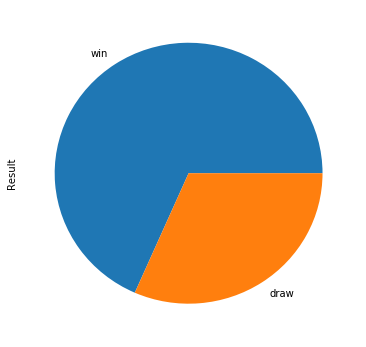

In [260]:
group_stage['Result'].value_counts()[1:].plot(kind='pie', figsize=(6,6),labels=['win','draw'])

Above is the percentage of wins to draws in the group stages

Lets use a kernel density estimation plot, to see the distribution of the Ball Possession Percentage of wins and losses and draws

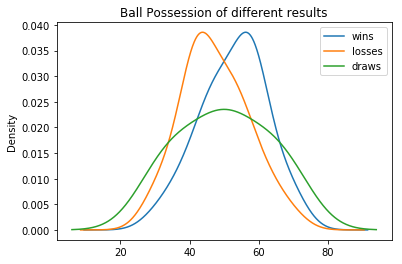

In [231]:
plt.figure()
plt.title('Ball Possession of different results')
group_stage[group_stage['Result']==1]['Ball Possession %'].plot(kind='kde',legend=True,label='wins')
group_stage[group_stage['Result']==0]['Ball Possession %'].plot(kind='kde',legend=True,label='losses')
group_stage[group_stage['Result']==0.5]['Ball Possession %'].plot(kind='kde',legend=True,label='draws')

that's a nice way to see the relationship of the result and different variables, let's exploit it abit.
let's define a function that takes column names, and lays a grid and plots them in that manner

In [250]:
def plot_cols(arr):
    plt.figure(figsize=(10,10))
    for i in range(len(arr)):
        plt.subplot(3,3,i+1)
        plt.title(arr[i])
        group_stage[group_stage['Result']==1][arr[i]].plot(kind='kde',legend=True,label='wins')
        group_stage[group_stage['Result']==0][arr[i]].plot(kind='kde',legend=True,label='losses')
        group_stage[group_stage['Result']==0.5][arr[i]].plot(kind='kde',legend=True,label='draws')

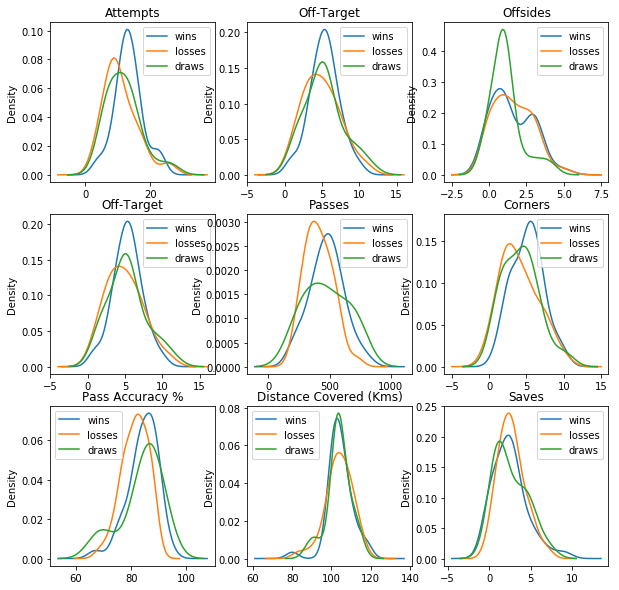

In [251]:
plot_cols(['Attempts','Off-Target','Offsides','Off-Target','Passes','Corners','Pass Accuracy %','Distance Covered (Kms)','Saves'])

Something i really wanna look at is how the distance covered of each team behaves as a function of time.
my intuition is it should drop significantly for weaker teams, while stays constant for bigger teams.

Another thing that might make a good feature, is the difference in Distance covered.

In [397]:
team_indexed=group_stage.set_index('Team')

In [395]:
pnts=[]
for x in group_stage.set_index('Team').index:
    pnts.append(list((group_stage.set_index('Team').loc[x]['Distance Covered (Kms)'])))

In [409]:
pnts[:10]

[[118, 115, 98],
 [105, 100, 101],
 [112, 110, 106],
 [111, 101, 101],
 [101, 107, 111],
 [100, 106, 93],
 [102, 105, 89],
 [103, 105, 103],
 [103, 103, 104],
 [111, 114, 105]]

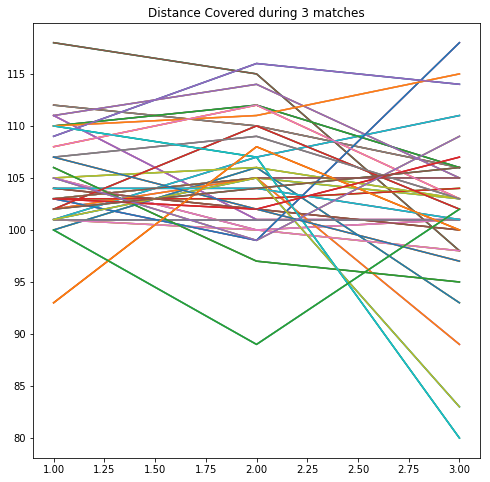

In [414]:
plt.figure(figsize=(8,8))
plt.title("Distance Covered during 3 matches")
for i in pnts:
    plt.plot([1,2,3],i)

As expected, the Distance Covered seems to fall sharply for most teams in the 3rd match

## To be continued for sure!